# Module 3 : Performance measurements of Logistic regression

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = p.read_csv('UPI_FRAUD.csv')

In [4]:
del data['TransactionDate']
del data['Merchant_id']

In [5]:
df=data.dropna()

In [6]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Is_declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='isFradulent', axis=1)
#Response variable
y = df.loc[:,'isFradulent']    

In [8]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  2152
Number of test dataset:  923
Total number of dataset:  3075


In [9]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictLR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictLR))

print("")
cm1=confusion_matrix(y_test,predictLR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.96      0.96      0.96       134

    accuracy                           0.99       923
   macro avg       0.98      0.98      0.98       923
weighted avg       0.99      0.99      0.99       923


Confusion Matrix result of Logistic Regression is:
 [[784   5]
 [  5 129]]

Sensitivity :  0.9936628643852978

Specificity :  0.9626865671641791

Cross validation test results of accuracy:
[0.9902439  0.98211382 0.9804878  0.97723577 0.98536585]

Accuracy result of Logistic Regression is: 98.30894308943088


In [16]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("c"))
    plt.title("Accuracy comparison of UPI FRAUD",fontsize=15)
    plt.legend(b,data,fontsize=9)

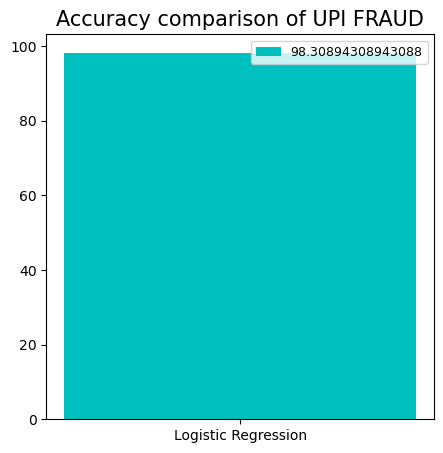

In [17]:
graph()

In [13]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 784
True Negative : 5
False Positive : 5
False Negative : 129

True Positive Rate : 0.8587075575027382
True Negative Rate : 0.5
False Positive Rate : 0.5
False Negative Rate : 0.14129244249726178

Positive Predictive Value : 0.9936628643852978
Negative predictive value : 0.03731343283582089


Confusion matrix-Logistic_Regression:
[[784   5]
 [  5 129]]


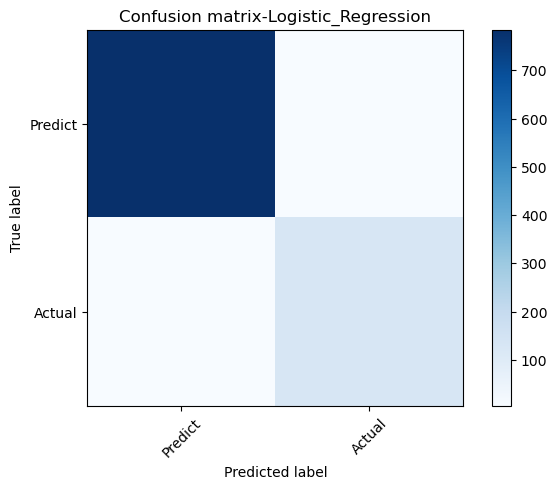

In [14]:
def plot_confusion_matrix(cm1, title='Confusion matrix-Logistic_Regression', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictLR)
print('Confusion matrix-Logistic_Regression:')
print(cm1)
plot_confusion_matrix(cm1)

Creating pkl File

In [15]:
# import joblib
# joblib.dump(logR,'lr.pkl')